In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from numpy import unique
from numpy import argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
import time

In [2]:
train = pd.read_csv("../Data/mnist_train.csv", header=None)
test = pd.read_csv("../Data/mnist_test.csv", header=None)

trainX = train[train.columns[1:]].to_numpy().reshape((-1, 28, 28))
trainy = train[train.columns[0]].to_numpy()
testX = test[test.columns[1:]].to_numpy().reshape((-1, 28, 28))
testy = test[test.columns[0]].to_numpy()

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


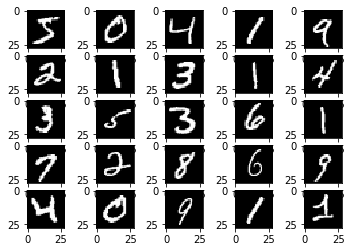

In [3]:
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(25):
    pyplot.subplot(5, 5, i+1)
    pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [4]:
trainX = trainX.reshape((trainX.shape[0], trainX.shape[1], trainX.shape[2], 1))
testX = testX.reshape((testX.shape[0], testX.shape[1], testX.shape[2], 1))

In [5]:
in_shape = trainX.shape[1:]
in_shape

(28, 28, 1)

In [6]:
n_classes = len(unique(trainy))
n_classes

10

In [7]:
# Normalize
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

In [8]:
# Create CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2), strides=(2,2)))
model.add(Conv2D(32, (2, 2), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPool2D((2, 2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(500, activation='relu', kernel_initializer='he_uniform'))
# model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        4128      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               576500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
%%time
# Train
start_time = time.time()
model.fit(trainX, trainy, epochs=10, batch_size=128, verbose=1)
elapsed_time = time.time() - start_time
print(f"Time: {elapsed_time}")

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 16s 266us/sample - loss: 0.1441 - accuracy: 0.9563
Epoch 2/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.0442 - accuracy: 0.9862
Epoch 3/10
60000/60000 [==============================] - 16s 264us/sample - loss: 0.0281 - accuracy: 0.9913
Epoch 4/10
60000/60000 [==============================] - 16s 263us/sample - loss: 0.0203 - accuracy: 0.9934
Epoch 5/10
60000/60000 [==============================] - 16s 274us/sample - loss: 0.0137 - accuracy: 0.9957
Epoch 6/10
60000/60000 [==============================] - 16s 268us/sample - loss: 0.0102 - accuracy: 0.9970
Epoch 7/10
60000/60000 [==============================] - 16s 260us/sample - loss: 0.0095 - accuracy: 0.9969
Epoch 8/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.0078 - accuracy: 0.9974- loss: 0.0077 - accuracy: 
Epoch 9/10
60000/60000 [==============================] - 15s 257us/sample - l

In [12]:
# Evaluate
loss, acc = model.evaluate(testX, testy, verbose=0)
print('Accuracy: %.3f' % acc)

Accuracy: 0.991
